# Loan Application Status Prediction

Problem Statement:

    This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

prediction:
    
    To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing the dataset

In [6]:
df=pd.read_csv(r'C:\Users\Praveen kumar\Downloads\loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


observation:
    
    1)The given dataset contains numerical and categorical columns.
    
    2)"loan status" is our target variable which has the two classes yes or no,thts why we are going to use classification problem

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [8]:
# checking the dimension of dataset
df.shape

(614, 13)

observation:
    
    The dataset contains 614 rows and 13 comumns which inclues both categoricla and numerical data .

    Also out of 13 columns 12 are features and remaining 1 is our target variable .

In [9]:
# checking the type of dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
# to get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
# checking number of unique values in each columns
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Let's check the list of value counts in each columns to find if there are any unexpected or corrupted entries in the dataset.

In [12]:
# checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('************************************************************')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
************************************************************
Male      489
Female    112
Name: Gender, dtype: int64
************************************************************
Yes    398
No     213
Name: Married, dtype: int64
************************************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
************************************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
************************************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
************************************************************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Leng

The column Loan_ID is the unique ID given to the applicants also it has no significant in the prediction so let's drop this column

In [13]:
# removing unwanted column
df.drop("Loan_ID", axis=1,inplace=True)

In [14]:
# checking null values in the dataframe
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

It as the number of missing values in some of the columns,so we go for the imputation method

# Visualizations

<AxesSubplot:>

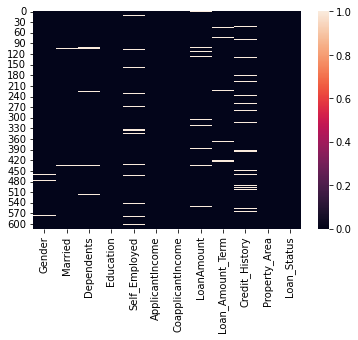

In [15]:
# let's visualize the null values clearly
sns.heatmap(df.isnull())

White lines denotes the missing values in the dataset

In [16]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

# Imputation method

There are both categorical and numerical columns which have missing values, so will fill them by using appropriate methods.

In [17]:
# let's check the mode of the categorical columns to fill the null values

print("The mode of Gender  is:",df['Gender'].mode())        # we will fill the null values using its mode
print("The mode of Married  is:",df['Married'].mode())
print("The mode of Dependents  is:",df['Dependents'].mode())
print("The mode of Self_Employed  is:",df['Self_Employed'].mode())
print("The mode of Credit_History  is:",df['Credit_History'].mode())
print("The mode of Loan_Amount_Term  is:",df['Loan_Amount_Term'].mode())

The mode of Gender  is: 0    Male
dtype: object
The mode of Married  is: 0    Yes
dtype: object
The mode of Dependents  is: 0    0
dtype: object
The mode of Self_Employed  is: 0    No
dtype: object
The mode of Credit_History  is: 0    1.0
dtype: float64
The mode of Loan_Amount_Term  is: 0    360.0
dtype: float64


1)These are modes of the categorical columns which contains null values and it as highly repeated in the columns.

2)The missing values will be replaced by their respective mode values.

In [18]:
# Filling the missing values in Gender by its mode Male
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

# Filling the missing values in Married by its mode Yes
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

# Filling the missing values in Dependents by its mode 0 
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

# Filling the missing values in Self_Employed by its mode No
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

# Filling the missing values in Credit_History  by its mode  No
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

# Filling the missing values in Loan_Amount_Term  by its mode 360 
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [19]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
# let's check the median values of the numerical columns
print("The median of LoanAmount is:", df["LoanAmount"].median())

The median of LoanAmount is: 128.0


In [21]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [22]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

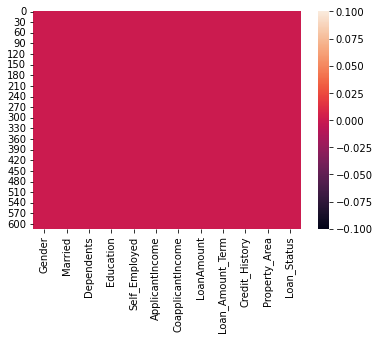

In [23]:
# let's visualize the null values clearly
sns.heatmap(df.isnull())

In [24]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [26]:
# checking the list of counts in target columns
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [27]:
# checking wheather the dataset contains any space
df.loc[df['Loan_Status']==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


# Description of DataSet

In [28]:
# Statistical summary of dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


observations:
    
    1)There are no null values and counts os all columns are similar
    
    2)Median is more than mean in credit_history and Loan_Amount_term are skewed to left
    
    3)The mean value is greater in median in applicanthome,coapplicantincome,Loanamount are skewd to right
   
    4) we can infer that there is a huge difference in max and 75% percentile means there are huge outliers present in the dataset .We have to remove these outliers

# Data Visualization

# Univariate Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64


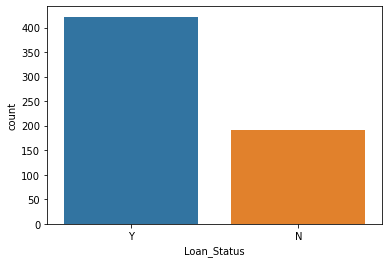

In [29]:
# visualizing the loan approval status
print(df['Loan_Status'].value_counts())
sns.countplot(df['Loan_Status'])
plt.show()

from the plot,we see the imbalance issue and y as the maximun of 422 candidates and 192 candidates loan application are rejected

Male      502
Female    112
Name: Gender, dtype: int64


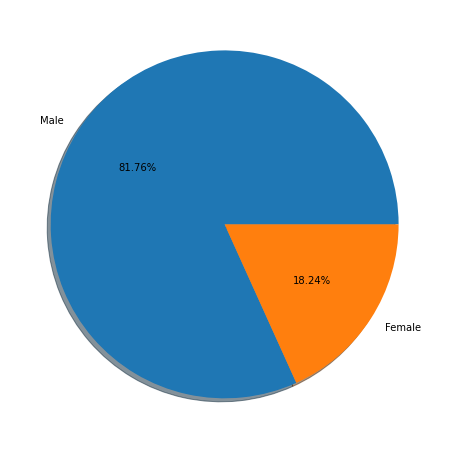

In [30]:
# Visualize the count of applicants Gender
print(df['Gender'].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

There are about 81% of the Male candidates and only 18% of Female candidates are applying for the loan.

Yes    401
No     213
Name: Married, dtype: int64


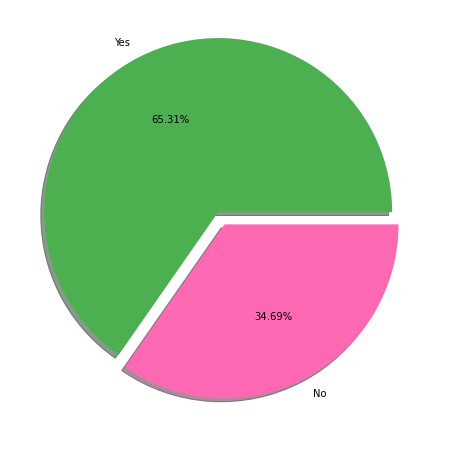

In [31]:
# Visualize the count of marital status of the applicants 
print(df['Married'].value_counts())
labels='Yes','No'
colors = ['#4CAF50', 'hotpink']
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Married'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True, colors=colors, explode=(0.08,0))
plt.show()

There are about 65% of the applicants who got married and about 34% of the applicants are unmarried.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


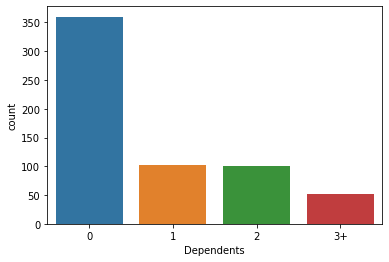

In [32]:
# Visualize the count of Dependents
print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


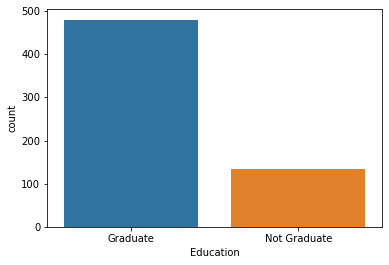

In [33]:
# visualizing the count of Education of the applicants

print(df['Education'].value_counts())
sns.countplot(df['Education'])
plt.show()

The count of Graduate applicants is high in counts means the maximum number of Graduated applicants are applying for the loan.

No     532
Yes     82
Name: Self_Employed, dtype: int64


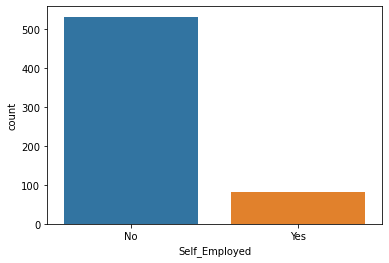

In [34]:
# visualizing the count of Self_Employed applicants

print(df['Self_Employed'].value_counts())
sns.countplot(df['Self_Employed'])
plt.show()

most of the candidates are not self employed it might be they were working at any private sector and below 100 candidates only runing their own business

1.0    525
0.0     89
Name: Credit_History, dtype: int64


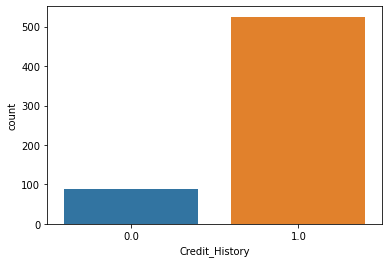

In [35]:
# visualizing the count of Credit_History of the applicants

print(df['Credit_History'].value_counts())
sns.countplot(df['Credit_History'])
plt.show()

In [37]:
# now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# Distribution of Skewness

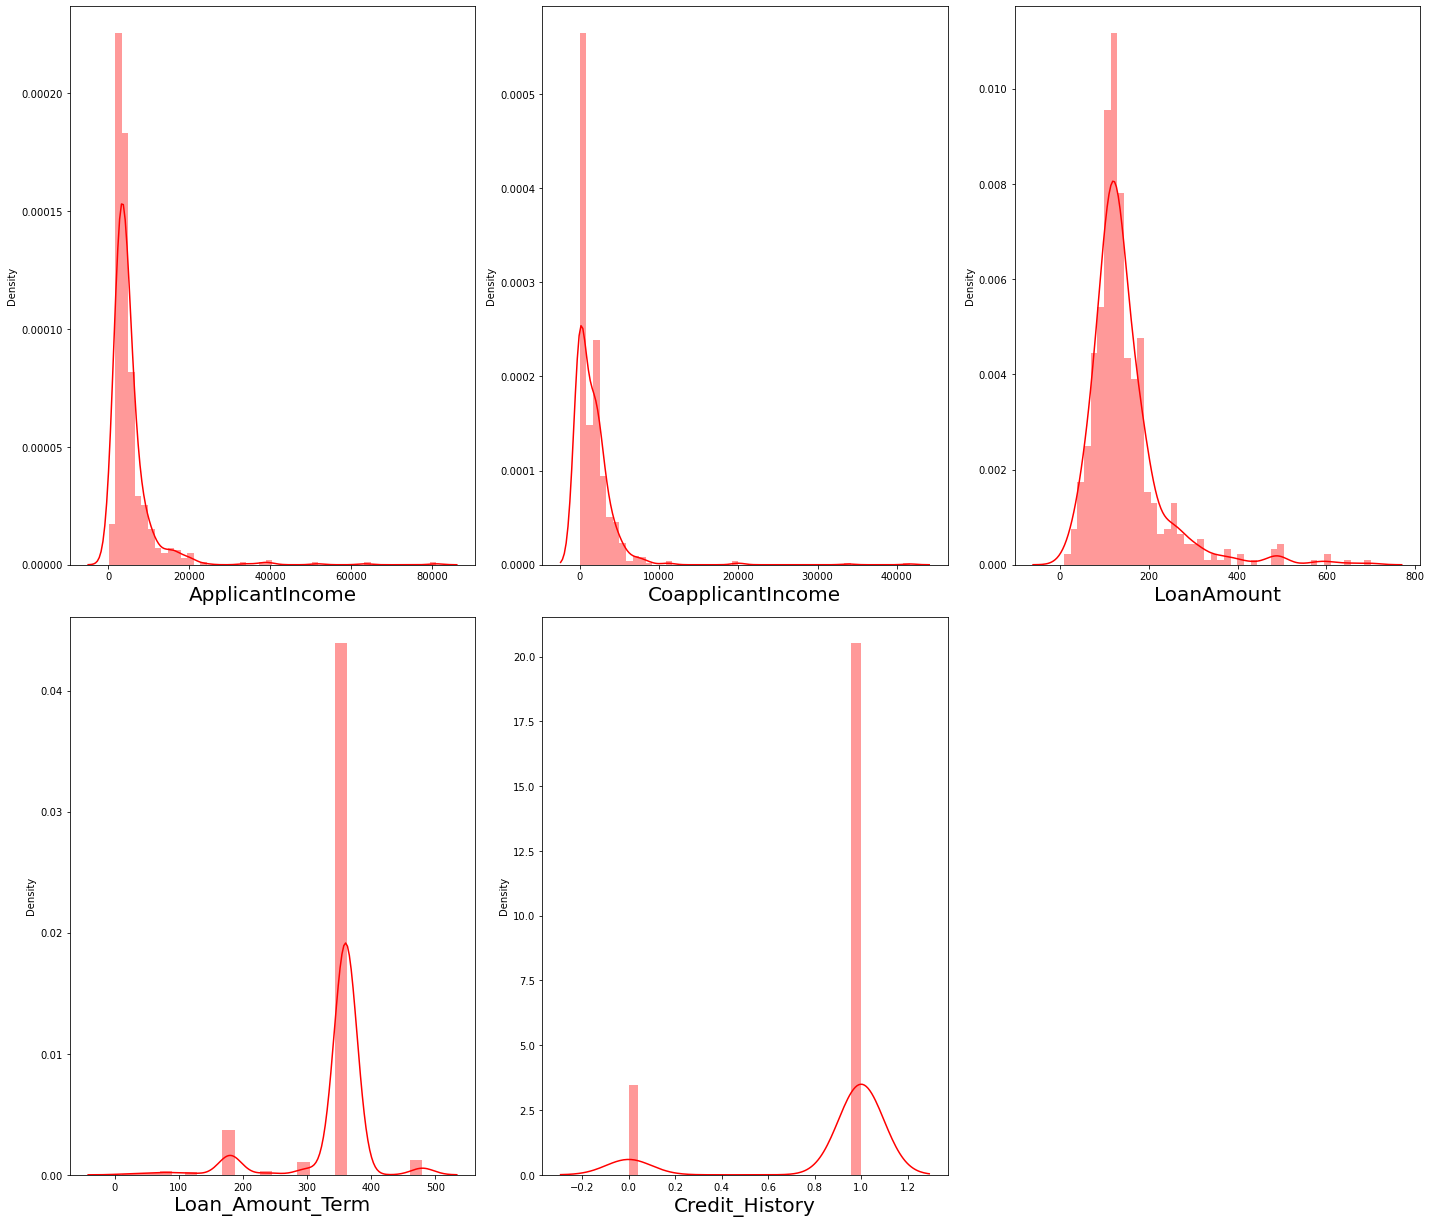

In [38]:
# checking how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='White')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From above distribution plot we can observe :

1)The data is not normally distributed in any of the columns.

2)The mean value is greater than the median in ApplicatIncome, CoapplicantIncome, LoanAmount and ToalIncome which means they are skewed to right.

3)The median is greater than the mean in Loan_Amount_Term and Credit_History columns which means they are skewed to left.

# Bivariate Analysis

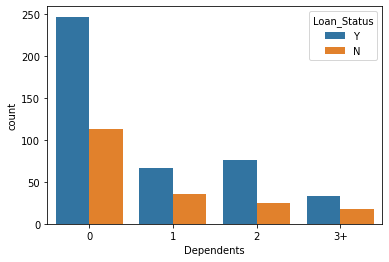

In [41]:
# visualizing count  of Dependents of the applicants on the basis of Loan Status
sns.countplot(df['Dependents'],hue=df['Loan_Status'])
plt.show()

observation:The applicants who have dependents 0 are more likely to get their loan approved.

No     532
Yes     82
Name: Self_Employed, dtype: int64


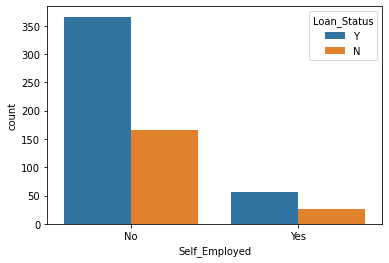

In [42]:
# visualizing whether the applicants are Self_Employed or not
print(df['Self_Employed'].value_counts())
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


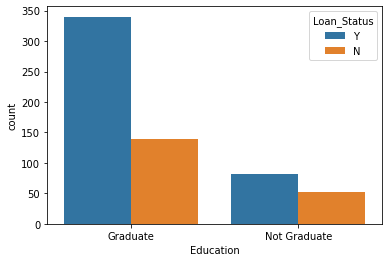

In [43]:
# visualizing count  of Education of the applicants
print(df['Education'].value_counts())
sns.countplot(df['Education'],hue=df['Loan_Status'])
plt.show()

observation:Most of the candidates are applying for loan are graduated and only few are not graduated. Also the applicants who are graduated have tendency of getting loans than who are not.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


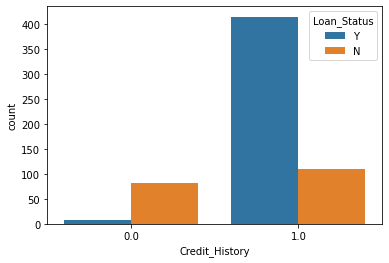

In [44]:
# visualizing the count of the Credit_History of the applicants
print(df['Credit_History'].value_counts())
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])
plt.show()

observation:The plot gives the information of the applicants who took in the past have cleared or not.The applicants who have credit history 1 have got their loan approval which means they have cleared their past loans.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


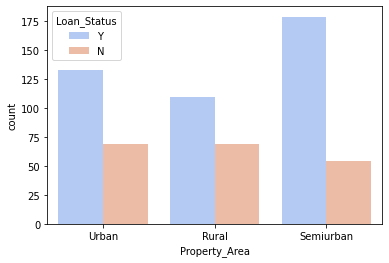

In [46]:
# visualizing Property_Area of th eapplicants
print(df['Property_Area'].value_counts())
sns.countplot(df['Property_Area'],hue=df['Loan_Status'],palette='coolwarm')
plt.show()

observation:From the plot semi urban are playing major role in getteing loan compared with urban and rural area

Male      502
Female    112
Name: Gender, dtype: int64


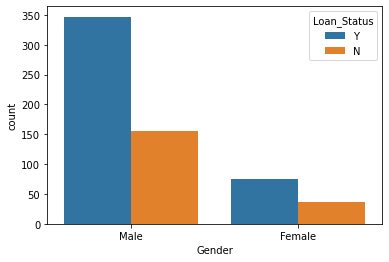

In [47]:
# visualizing Gender of  the applicants 
print(df['Gender'].value_counts())
sns.countplot(df['Gender'],hue=df['Loan_Status'])
plt.show()

observation:more male candidates got the loan approval compared with the female candidates.

Yes    401
No     213
Name: Married, dtype: int64


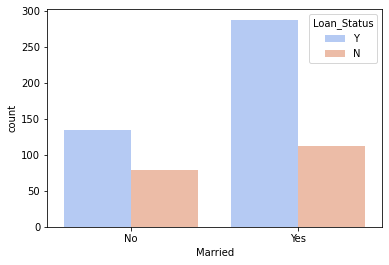

In [49]:
# visualizing Married status of the applicants
print(df['Married'].value_counts())
sns.countplot(df['Married'],hue=df['Loan_Status'],palette="coolwarm")
plt.show()

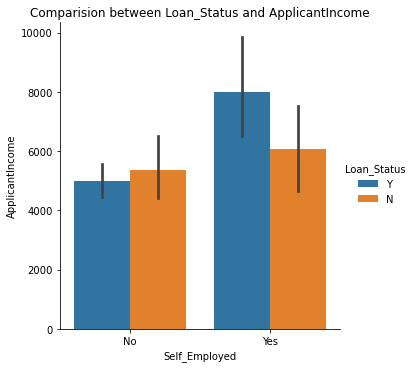

In [52]:
# checking relation between Self_Employed and ApplicantIncome
sns.catplot(x='Self_Employed',y='ApplicantIncome',data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between Loan_Status and ApplicantIncome")
plt.show()

The applicants whose loan got approved have average income and have their own business means they are self employed

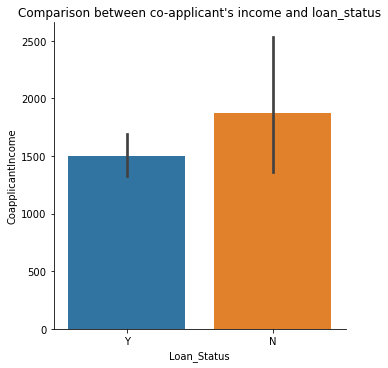

In [54]:
# checking the relationship between Loan_Status and CoapplicantIncome
sns.catplot(x='Loan_Status',y="CoapplicantIncome",data=df,kind='bar')
plt.title("Comparison between co-applicant's income and loan_status")
plt.show()


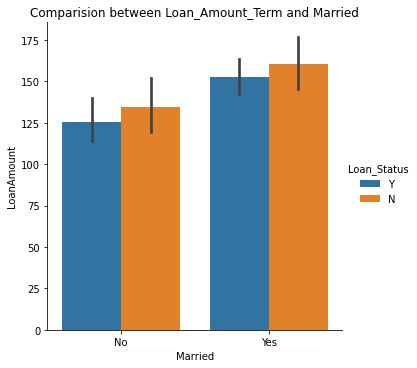

In [55]:
# checking relation between LoanAmount and Married on the basis of target
sns.catplot(x='Married',y="LoanAmount",data=df,kind='bar',hue="Loan_Status")
plt.title("Comparision between Loan_Amount_Term and Married")
plt.show()

observation:Married candidates as the high count in getting loan compared with other

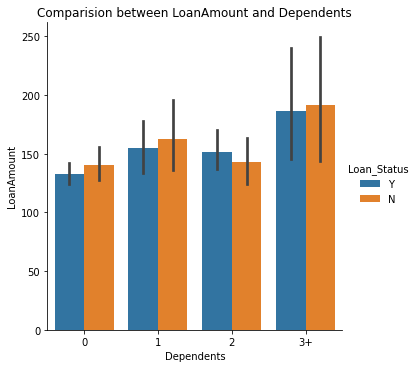

In [56]:
# checking relation between Loan_Amount and Dependents on the basis of target
sns.catplot(x='Dependents',y="LoanAmount",data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between LoanAmount and Dependents")
plt.show()

observation:the applicants those who are having more than three dependants as their loan approved

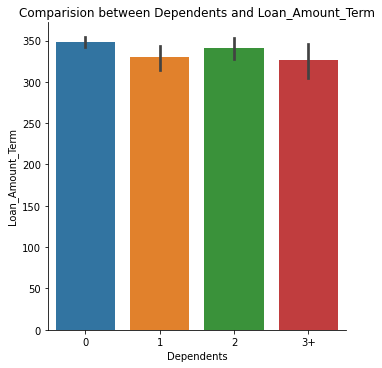

In [57]:
# checking relation between Loan_Amount_Term and Dependents
sns.catplot(x='Dependents',y="Loan_Amount_Term",data=df,kind='bar')
plt.title("Comparision between Dependents and Loan_Amount_Term")
plt.show()

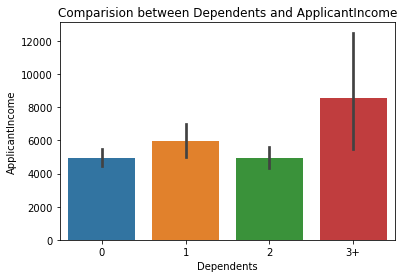

In [58]:
# let's check the applicant income as per Dependents
sns.barplot(x='Dependents',y="ApplicantIncome",data=df)
plt.title("Comparision between Dependents and ApplicantIncome")
plt.show()

observation:the applicants as more than three dependants having the high average income compare with the remaining categories

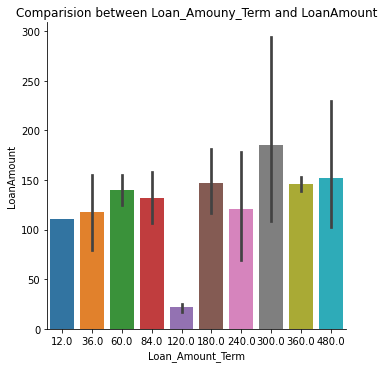

In [59]:
# comparing Loan_Amount_Term and LoanAmount
sns.catplot(x='Loan_Amount_Term',y="LoanAmount",data=df,kind='bar')
plt.title("Comparision between Loan_Amouny_Term and LoanAmount")
plt.show()

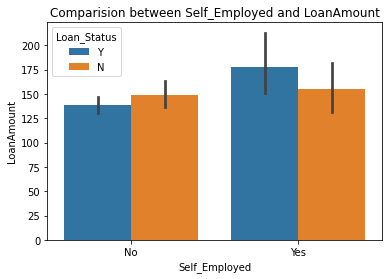

In [60]:
# let's compare the loan amount with self employed
sns.barplot(x="Self_Employed",y="LoanAmount",data=df,hue='Loan_Status')
plt.title("Comparision between Self_Employed and LoanAmount")
plt.show()

# Multivariate Analysis

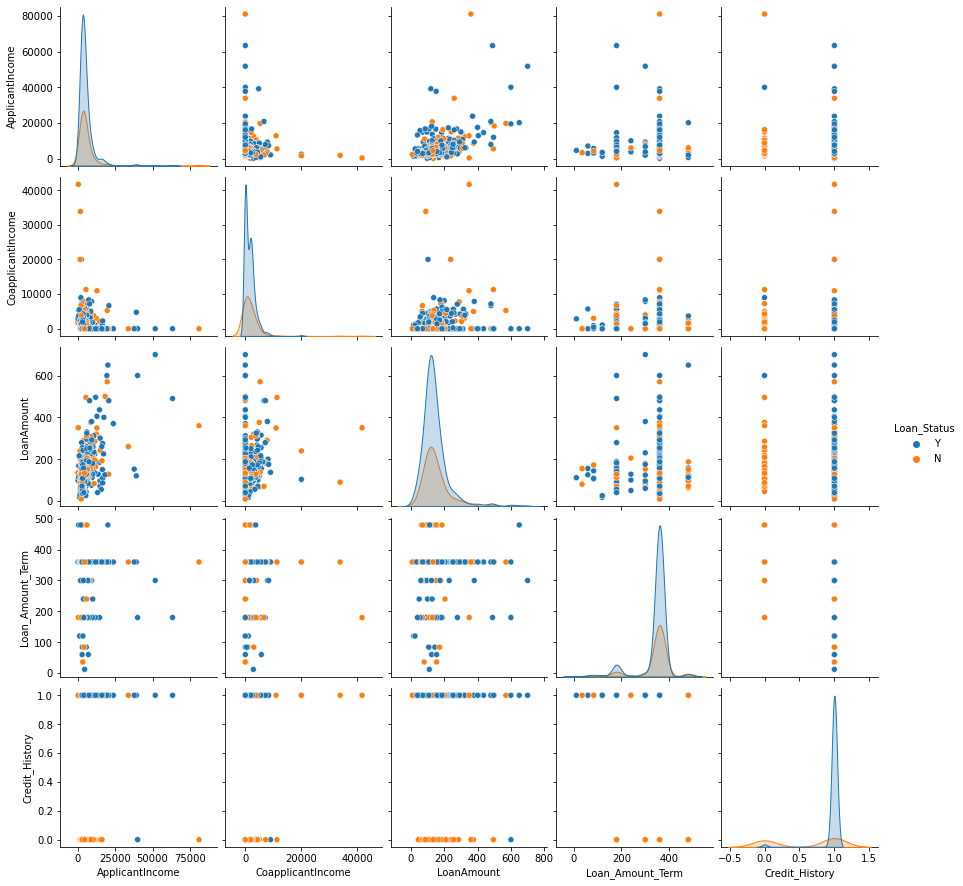

In [61]:
# checking the pairwise relation in the dataset
sns.pairplot(df,hue="Loan_Status")

Observations:
    
    1)The plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Loan_Status".
    
    2)It as the  linear relationship between ApplicatIncome and LoanAmount, CoapplicantIncome and LoanAmount, ApplicantIncome and TotalIncome.
    
    3)Here we have the relation between the features and label and outliers present in some of the columns.

# Identifying the outliers

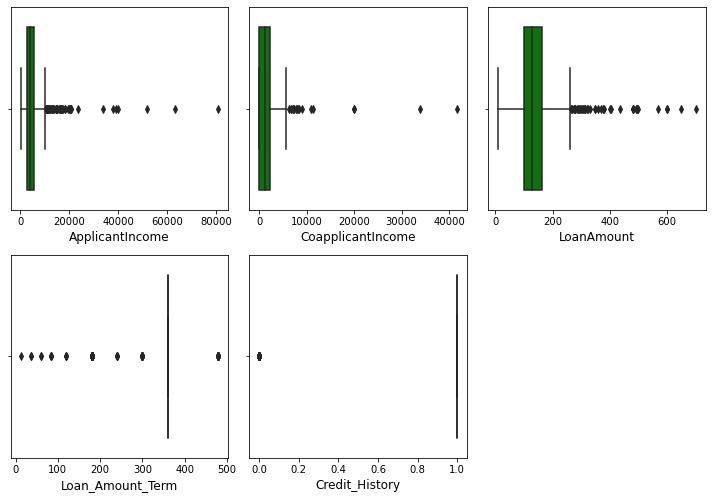

In [62]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

from this plot outliers present in the columns so we need to remove outliers using ZSCORE orIQR method

# Removing Outliers


In [63]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [66]:
numerics = ['int8','int16','int32','int64','float16','float32','float64']
categorical_columns = []
features=df.columns.values.tolist()

for col in features:
    if df[col].dtypes in numerics:
        continue
    df[col] = LabelEncoder().fit_transform(df[col])


In [67]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# IQR METHOD

In [72]:
# numerical columns containing outliers
features = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
Q1 = features.quantile(0.25)

Q3 = features.quantile(0.75)

IQR = Q3-Q1

df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(459, 12)

In [77]:
# checking the data loss
data_loss = (614-459)/614*100
data_loss

25.2442996742671

# ZSCORE METHOD

In [73]:
# numerical columns containing outliers
features = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

#using zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.211241,0.273231
1,0.134412,0.038732,0.211241,0.273231
2,0.393747,0.554487,0.948996,0.273231
3,0.462062,0.251980,0.306435,0.273231
4,0.097728,0.554487,0.056551,0.273231
...,...,...,...,...
609,0.410130,0.554487,0.889500,0.273231
610,0.212557,0.554487,1.258378,2.522836
611,0.437174,0.472404,1.276168,0.273231
612,0.357064,0.554487,0.490816,0.273231


In [74]:
new_df = df[(z<3).all(axis=1)]
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [75]:
# Shape of new dataframe
new_df.shape

(577, 12)

In [76]:
# checking the data loss
data_loss = (614-577)/614*100
data_loss

6.026058631921824

 From the two method,we proceed with ZSCORE METHOD as low data loss compared with iqr method

# Checking the skewness

In [79]:
new_df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Removing Skewness using yeo-johnson method

In [80]:
skew = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [81]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [82]:
# checking skewness after using yeo-johnson method
new_df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

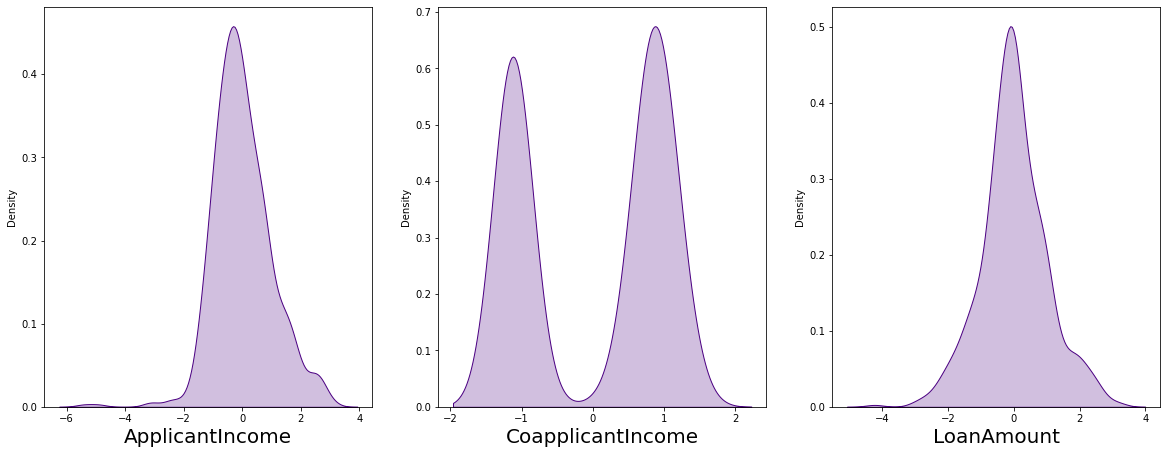

In [83]:
# after removing skewness let's check how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Correlation between the target variable and independent variables using HEAT map

In [84]:
cor = new_df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


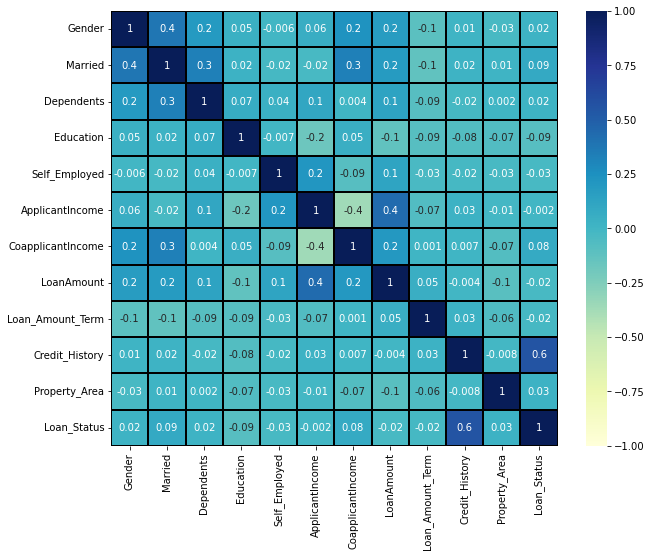

In [85]:
# visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);


This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.

In [86]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.079344
Property_Area        0.026507
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.002484
Loan_Amount_Term    -0.020291
LoanAmount          -0.023609
Self_Employed       -0.026525
Education           -0.092658
Name: Loan_Status, dtype: float64

# Visualizing the correlation between label and features using bar plot

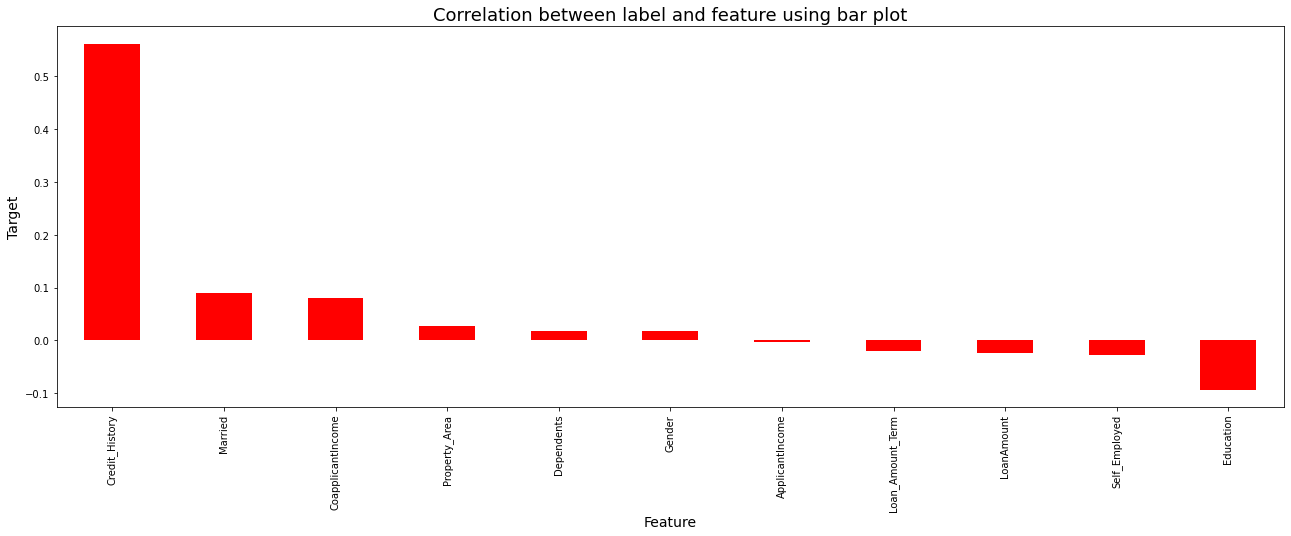

In [87]:
plt.figure(figsize=(22,7))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title("Correlation between label and feature using bar plot", fontsize=18)
plt.show()

The column ApplicantIncome has very less correlation with the target . So we can drop this column

# Separating the features and label variables into x and y

In [88]:
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

In [90]:
x.shape

(577, 11)

In [91]:
y.shape

(577,)

# Feature Scaling using Standard Scalarization

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


In [93]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

# Oversampling

In [94]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [95]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [96]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


# Modeling

Finding best random state

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.899581589958159  on Random_state  68


We get the best accuracy at 90 on the random state at 68

# Creating train_test_split

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Classification Algorithm
    1)Decision Tree Classifier
    2)Random Forest Classifier
    3)Logistic Regression
    4)KNeighbors Classifier
    5)Gradient Boosting Classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [100]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

# prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test, predDTC))

0.8117154811715481
[[ 87  15]
 [ 30 107]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       102
           1       0.88      0.78      0.83       137

    accuracy                           0.81       239
   macro avg       0.81      0.82      0.81       239
weighted avg       0.82      0.81      0.81       239



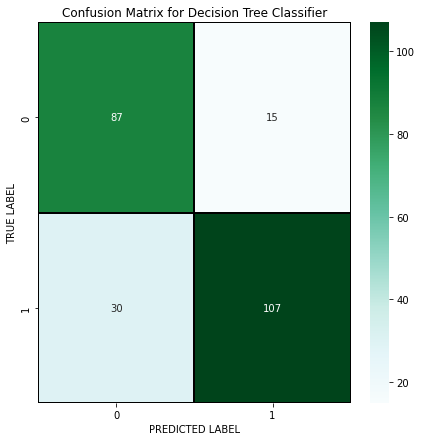

In [101]:
# let's plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = ".0f", ax=ax, cmap="BuGn", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# Random Forest Classifier

In [102]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.891213389121339
[[ 89  13]
 [ 13 124]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       102
           1       0.91      0.91      0.91       137

    accuracy                           0.89       239
   macro avg       0.89      0.89      0.89       239
weighted avg       0.89      0.89      0.89       239



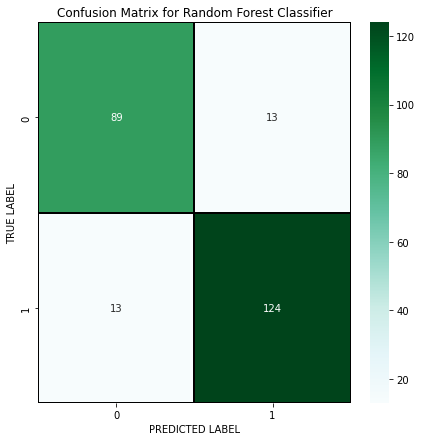

In [103]:
# let's plot confusion matrix for RFC
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = ".0f", ax=ax, cmap="BuGn", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

# Logistic Regression

In [104]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

# prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7698744769874477
[[ 63  39]
 [ 16 121]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       102
           1       0.76      0.88      0.81       137

    accuracy                           0.77       239
   macro avg       0.78      0.75      0.76       239
weighted avg       0.77      0.77      0.76       239



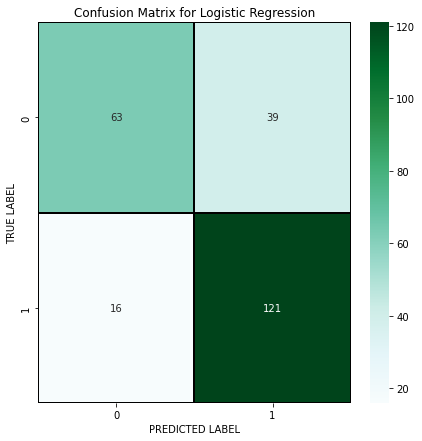

In [105]:
# let's plot confusion matrix for LR
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = ".0f", ax=ax, cmap="BuGn", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# KNeighbors Classifier

In [106]:
knn = KNN()
knn.fit(x_train,y_train)

# prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.7782426778242678
[[ 86  16]
 [ 37 100]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       102
           1       0.86      0.73      0.79       137

    accuracy                           0.78       239
   macro avg       0.78      0.79      0.78       239
weighted avg       0.79      0.78      0.78       239



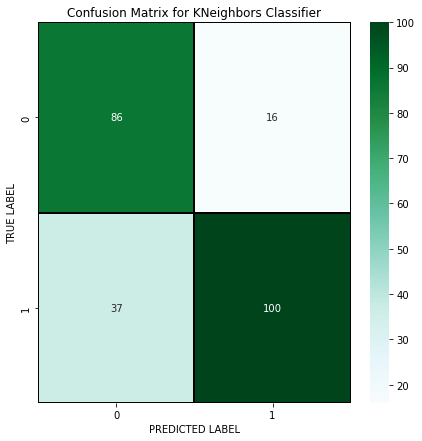

In [107]:
# let's plot confusion matrix for KNN
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = ".0f", ax=ax, cmap="BuGn", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for KNeighbors Classifier")
plt.show()

# Gradient Boosting Classifier

In [108]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8661087866108786
[[ 80  22]
 [ 10 127]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       102
           1       0.85      0.93      0.89       137

    accuracy                           0.87       239
   macro avg       0.87      0.86      0.86       239
weighted avg       0.87      0.87      0.86       239



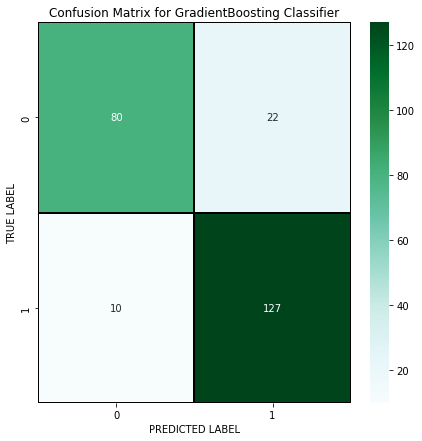

In [109]:
# let's plot confusion matrix for GB
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = ".0f", ax=ax, cmap="BuGn", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for GradientBoosting Classifier")
plt.show()

# Checking the Cross Validation Score

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC ,x,y,cv=5).mean())
# cv score for Random Forest Classifier
print(cross_val_score(RFC ,x,y,cv=5).mean())
# cv score for Logistic Regression
print(cross_val_score(LR ,x,y,cv=5).mean())
# cv score for KNN Classifier
print(cross_val_score(knn ,x,y,cv=5).mean())
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB ,x,y,cv=5).mean())

0.7927515723270441
0.840550314465409
0.714819182389937
0.7525314465408804
0.7928223270440252


observation:we can conclude that KNeighbors Classifier as our best fitting model which is giving very less difference compare to other models

# Hyper Parameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
# KNeighbors Classifier

parameters = {'n_neighbors':[2,3,4,5,6],
             'algorithm':['auto','ball_tree','kd_tree','brute'],
             'leaf_size':[10,20,30,40,50],
             'weights':['uniform','distance'],
             'p':[1,2,3,4,5]}

In [114]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [115]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [116]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

In [117]:
Loan = KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance',p=1)
Loan.fit(x_train,y_train)
pred = Loan.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.35564853556485


The accuracy of best model increased by 5% after tuning and giving 85.35% which is very good.

# Plotting ROC and compare AUC for all the models used

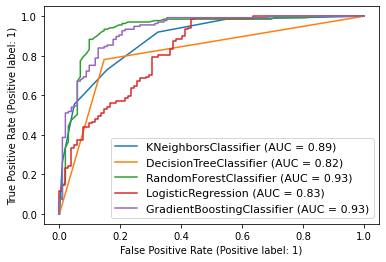

In [120]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC , x_test, y_test, ax=disp.ax_)      # ax_=Axes with confusion matrix
plot_roc_curve(RFC , x_test, y_test, ax=disp.ax_) 
plot_roc_curve(LR , x_test, y_test, ax=disp.ax_) 
plot_roc_curve(GB , x_test, y_test, ax=disp.ax_) 
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

This is the AUC-ROC curve for the models that we have used and is plotted False positive rate against True positive rate.

# Plotting ROC and compare AUC for the best model KNeighbors Classifier

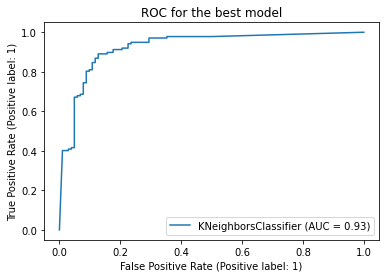

In [121]:
plot_roc_curve(Loan, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

This is the ROC curve for the best model KNN and AUC for KNN is 93%

# Saving the Model

In [122]:
import joblib
joblib.dump(Loan,"Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']

We have saved our model using joblib library

# Predicting the saved model

In [123]:
# let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Loan_Application_Status.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [125]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
234,0,0
235,0,0
236,0,0
237,0,1


We can observe both original and predicted values are same.
That means the loan approval status for both predicted and original are same.